In [1]:
import os
import pandas as pd

# Ask user for the file directory
file_dir = input("Enter the full path to your data folder: ")

# Change to that directory
os.chdir(file_dir)
print("Changed working directory to:", os.getcwd())

# List files there
print("Files in directory:", os.listdir())

# Load your required CSVs
df_neg = pd.read_csv('an_T23_C_24_dis.csv')   # Anode
df_pos = pd.read_csv('ca_T23_C_6_ch.csv')     # Cathode
df_cell_BOL = pd.read_csv('charge2.csv')      # Full cell beginning of life
df_cell_EOL = pd.read_csv('charge3866.csv')   # Full cell end of life

# Quick preview
print(df_neg.head())


Enter the full path to your data folder:  C:\Users\chari\ampworks\examples


Changed working directory to: C:\Users\chari\ampworks\examples
Files in directory: ['an_T23_C_24_dis.csv', 'ca_T23_C_6_ch.csv', 'charge2.csv', 'charge3866.csv', 'simple_dQdV_example.py']
        soc   voltage
0  0.000000  0.759138
1  0.002004  0.651879
2  0.004008  0.596713
3  0.006012  0.555424
4  0.008016  0.521584


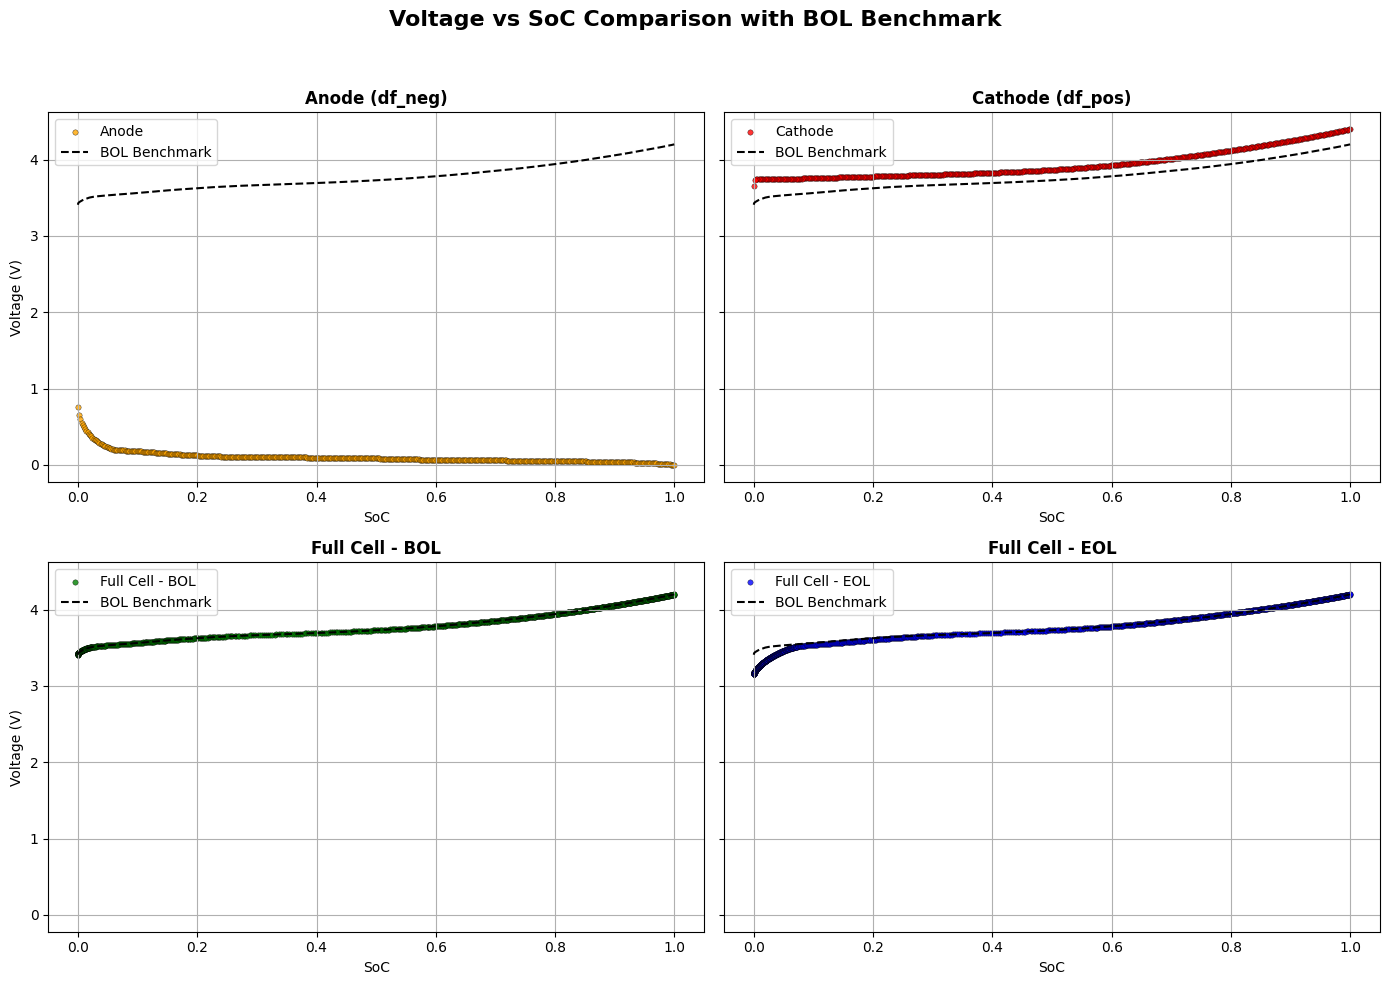

In [2]:
import matplotlib.pyplot as plt

# Define benchmark: Full Cell - BOL
benchmark_soc = df_cell_BOL['soc']
benchmark_voltage = df_cell_BOL['voltage']

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Define plot settings for clarity
marker_style = dict(s=15, alpha=0.8, edgecolors='k', linewidth=0.3)

# Plot Anode
axs[0, 0].scatter(df_neg['soc'], df_neg['voltage'], color='orange', label='Anode', **marker_style)
axs[0, 0].plot(benchmark_soc, benchmark_voltage, 'k--', label='BOL Benchmark')
axs[0, 0].set_title('Anode (df_neg)', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel('SoC')
axs[0, 0].set_ylabel('Voltage (V)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Cathode
axs[0, 1].scatter(df_pos['soc'], df_pos['voltage'], color='red', label='Cathode', **marker_style)
axs[0, 1].plot(benchmark_soc, benchmark_voltage, 'k--', label='BOL Benchmark')
axs[0, 1].set_title('Cathode (df_pos)', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel('SoC')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Full Cell BOL
axs[1, 0].scatter(df_cell_BOL['soc'], df_cell_BOL['voltage'], color='green', label='Full Cell - BOL', **marker_style)
axs[1, 0].plot(benchmark_soc, benchmark_voltage, 'k--', label='BOL Benchmark')
axs[1, 0].set_title('Full Cell - BOL', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel('SoC')
axs[1, 0].set_ylabel('Voltage (V)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Full Cell EOL
axs[1, 1].scatter(df_cell_EOL['soc'], df_cell_EOL['voltage'], color='blue', label='Full Cell - EOL', **marker_style)
axs[1, 1].plot(benchmark_soc, benchmark_voltage, 'k--', label='BOL Benchmark')
axs[1, 1].set_title('Full Cell - EOL', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel('SoC')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout
plt.suptitle('Voltage vs SoC Comparison with BOL Benchmark', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

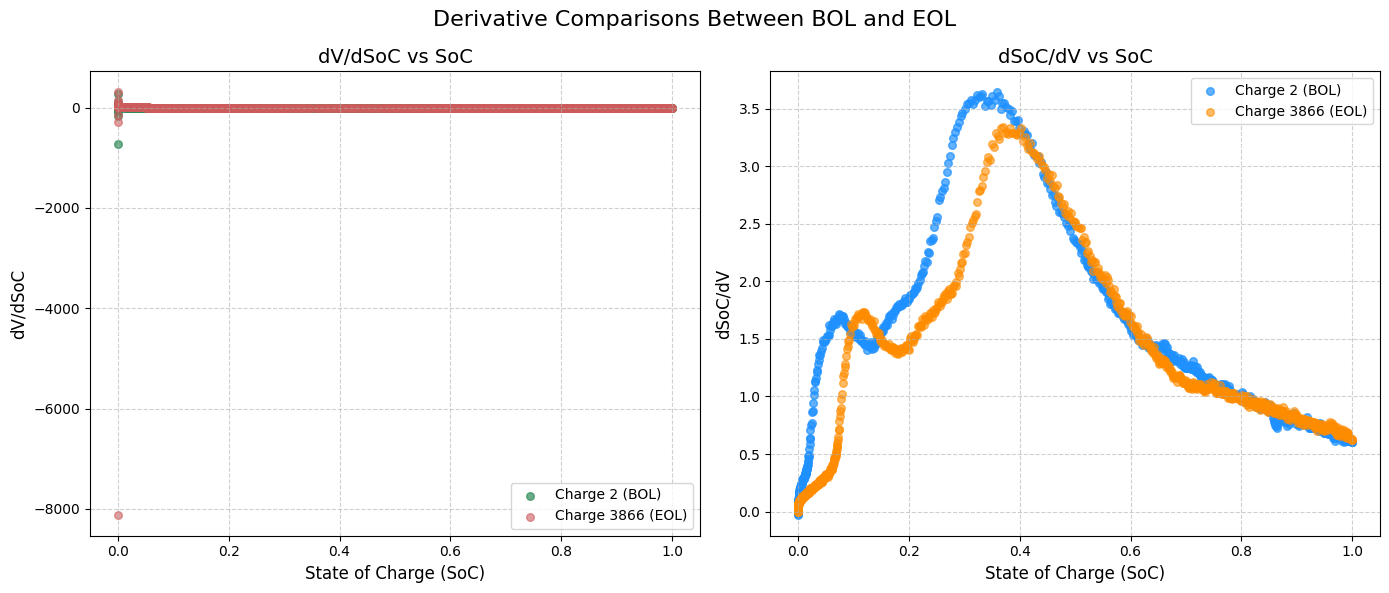

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load the CSV files into DataFrames
df_charge2 = pd.read_csv('charge2.csv')
df_charge3866 = pd.read_csv('charge3866.csv')

# ✅ Plot both dV/dSoC and dSoC/dV vs SoC for Charge 2 and Charge 3866
fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# 🎯 Plot 1: dV/dSoC vs SoC (Scatter)
axs[0].scatter(df_charge2['soc'], df_charge2['dV_dsoc'], label='Charge 2 (BOL)', color='seagreen', alpha=0.7, s=30)
axs[0].scatter(df_charge3866['soc'], df_charge3866['dV_dsoc'], label='Charge 3866 (EOL)', color='indianred', alpha=0.6, s=30)
axs[0].set_title('dV/dSoC vs SoC', fontsize=14)
axs[0].set_xlabel('State of Charge (SoC)', fontsize=12)
axs[0].set_ylabel('dV/dSoC', fontsize=12)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# 🎯 Plot 2: dSoC/dV vs SoC (Scatter)
axs[1].scatter(df_charge2['soc'], df_charge2['dsoc_dV'], label='Charge 2 (BOL)', color='dodgerblue', alpha=0.7, s=30)
axs[1].scatter(df_charge3866['soc'], df_charge3866['dsoc_dV'], label='Charge 3866 (EOL)', color='darkorange', alpha=0.6, s=30)
axs[1].set_title('dSoC/dV vs SoC', fontsize=14)
axs[1].set_xlabel('State of Charge (SoC)', fontsize=12)
axs[1].set_ylabel('dSoC/dV', fontsize=12)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Derivative Comparisons Between BOL and EOL', fontsize=16)
plt.tight_layout()
plt.show()